In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import allinone as aio

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
plt.style.use('ggplot')

In [2]:
df_dummy = pd.read_csv('forex_dummy.csv')

In [3]:
df_dummy.head(3)

,ind_132,ind_124,ind_116,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,...,ind_40_3,ind_40_4,ind_40_5,ind_40_6,ind_217_0,ind_217_1,ind_217_2,ind_217_3,ind_217_4,ind_217_5
0,-125,-25,-13,-22,-22,-21,-23,-36,-40,-43,...,1,0,0,0,0,1,0,0,0,0
1,-130,-28,-16,-18,-24,-24,-25,-38,-43,-45,...,1,0,0,0,0,1,0,0,0,0
2,-132,-28,-15,-11,-21,-22,-24,-36,-42,-44,...,1,0,0,0,0,1,0,0,0,0


## Model

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [5]:
dfModel = pd.DataFrame(columns = ['cross-score', 'cross-train', 'rsq_train', 'rsq_test', 'subt_rsq', 'mae_test', 'mse_test', 'rmse_test', 'mape_test'])

In [17]:
y = df_dummy['90_target']
X = df_dummy.drop(['90_target','buy'], axis=1)
model = LinearRegression()

dfModel = dfModel.append(aio.regframe(X, y, model, 'linear'))

In [18]:
y = df_dummy['90_target']
X = df_dummy.drop(['90_target','buy'], axis=1)
model = DecisionTreeRegressor()

dfModel = dfModel.append(aio.regframe(X, y, model, 'tree'))

In [8]:
dfModel

,cross-score,cross-train,rsq_train,rsq_test,subt_rsq,mae_test,mse_test,rmse_test,mape_test
linear,0.661,0.688,0.989,0.673,0.316,0.070,0.020,0.141,0.196
tree,-5.211,-0.906,1.000,-2.021,3.021,0.345,0.184,0.429,0.961


### Parametreler

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [11]:
y = df_dummy['90_target']
X = df_dummy.drop(['90_target','buy'], axis=1)

In [12]:
dtree = DecisionTreeRegressor()
params = {'criterion': ['mse'], 'min_samples_split': [2, 10], 'max_depth': [2, 8, 32], 'min_samples_leaf': [10, 30]}

In [13]:
k_fold = KFold(n_splits = 10, shuffle = False, random_state = 42)
gridcv_results = GridSearchCV(estimator = dtree, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 1).fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.9s finished


In [14]:
gridcv_results.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [15]:
y = df_dummy['90_target']
X = df_dummy.drop(['90_target','buy'], axis=1)
model = DecisionTreeRegressor(criterion='mse', min_samples_split=10, max_depth=8, min_samples_leaf=10)

dfModel = dfModel.append(aio.regframe(X, y, model, 'tree_p1'))

In [19]:
dfModel

,cross-score,cross-train,rsq_train,rsq_test,subt_rsq,mae_test,mse_test,rmse_test,mape_test
tree_p1,-5.957,-0.961,0.998,-8.034,9.032,0.613,0.551,0.742,1.712
linear,0.661,0.688,0.989,0.673,0.316,0.070,0.020,0.141,0.196
tree,-6.251,-0.916,1.000,-11.327,12.327,0.707,0.752,0.867,1.971


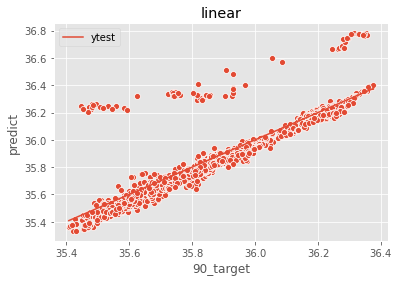

In [7]:
y = df_dummy['90_target']
X = df_dummy.drop(['90_target','buy'], axis=1)
model = LinearRegression()

aio.regplot(X, y, model, 'linear')

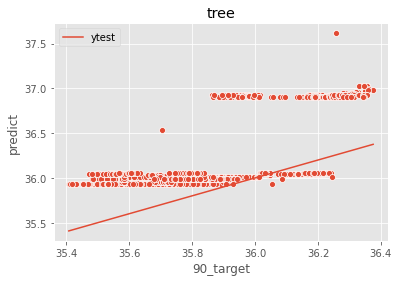

In [8]:
y = df_dummy['90_target']
X = df_dummy.drop(['90_target','buy'], axis=1)
model = DecisionTreeRegressor()

aio.regplot(X, y, model, 'tree')

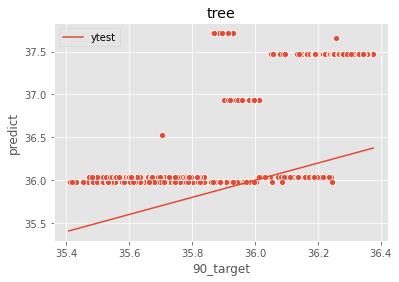

In [20]:
y = df_dummy['90_target']
X = df_dummy.drop(['90_target','buy'], axis=1)
model = DecisionTreeRegressor(criterion='mse', min_samples_split=10, max_depth=8, min_samples_leaf=10)

aio.regplot(X, y, model, 'tree')